# NN Scratch

In [1126]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [1127]:
# Helper function to plot a decision boundary.
# この関数は特に理解する必要はありません。
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
#plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [1128]:
pd.DataFrame(X).head()

,0,1
0,0.743461,0.464656
1,1.657557,-0.632032
2,-0.158789,0.255845
3,-1.088752,-0.396943
4,1.768052,-0.254432


In [1129]:
X.shape

(200, 2)

# 活性化関数

## 活性化関数の説明

## ニューラルネットワークにおける、活性化関数について説明せよ

## 活性化関数の実装

## 以下の活性化関数について実装し、それぞれの活性化関数の特徴について説明せよ。

ニューラルネットワークの活性化関数は、各層で入力信号に重みを掛け、バイアスを足した総和に適用する非線形関数です。
線形関数を適用すれば隠れ層のないネットワークで表現できるため、多層にすることの利点を活かすことができないからです。
機械学習のパーセプトロンとニューラルネットワークの主な違いは、この活性化関数にあります。

### ステップ関数
ステップ関数は、閾値を境にして出力が切り替わる非線形関数です。具体的には、入力した値が0以下のとき0になり、0より大きいときに1になる関数です。この関数を用いれば、あたかもスイッチの'on'と'off'のように、ニューロンの出力を０か１で表すことができます。
「単純パーセプトロン」の活性化関数に使用されます。

In [1130]:
def step_function(x):
    y = x > 0 # 配列要素に対して不等号の演算をしてTrue/Falseのbool値を返す
    return y.astype(np.int) # boolからintに型変換

#step_function(X)

In [1131]:
# x1 = np.arange(-5,5,0.1)
# x2 = step(x1)

# plt.plot(x1,x2)
# plt.xlabel("X", fontsize=15)
# plt.ylabel("Y", fontsize=15)
# plt.title("Step function", fontsize=20)
# plt.ylim(-0.1, 1.1)
# plt.show()

### シグモイド関数


入力した値が大きければ大きいほど1に近づき、入力した値が小さければ小さいほど0に近づく非線形関数です。ステップ関数に比べると入力に対して出力が連続的に変化するため、ニューロンの出力を連続的な実数値の信号として表すことがきます。
微分の計算も容易であることから1986年に発表されたバックプロパゲーションを伴うニューラルネットワークで使われます。
「多層パーセプトロン（ニューラルネットワーク）」の活性化関数として使用されます。

$\mathrm{sig}(a) = \frac{1}{1 + \exp(-a)}$

In [1132]:
# シグモイド関数
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

#sigmoid(X)


In [1133]:

# x1 = np.arange(-5,5,0.1)
# x2 = sigmoid(x1)

# plt.plot(x1,x2)
# plt.xlabel("X", fontsize=15)
# plt.ylabel("Y", fontsize=15)
# plt.title("Sigmoid function", fontsize=20)
# plt.ylim(-0.1, 1.1)
# plt.show()

### ReLU


入力した値が０以下の時０になり、0より大きいとき入力をそのまま出力します。近年よく使用される関数です。単純ゆえに計算が早く、x>0の部分では微分値が常に1であるため勾配消失の心配がないという特徴があります。 シグモイドに変わり主流になっています。
一方、あるとき常に同じ値を出してしまうことがあるという問題があります。

In [1134]:
def relu(x):
    return np.maximum(0, x)

#relu(X)

In [1135]:
# x1 = np.arange(-5,5,0.1)
# x2 = relu(x1)

# plt.plot(x1,x2)
# plt.xlabel("X", fontsize=15)
# plt.ylabel("Y", fontsize=15)
# plt.title("ReLU function", fontsize=20)
# plt.ylim(-0.1, 1.1)
# plt.show()

### tanh: 双曲線関数


ハイパボリックタンジェントと読みます。sigmoid関数と同じS字カーブの関数ですが、tanhは原点（0,0）で対象なS字カーブを描きます。 ニューラルネットワークの活性化関数でよく使われている関数で、微分した最大値１を返してくれるため、勾配消失問題の影響も受けにくいです。
活性化関数は原点対象であることが、望ましい性質として知られていることから、標準シグモイド関数よりもそれを線形変換した tanh の方が良いと提案されたという経緯があります。

In [1136]:
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

#tanh(X)

In [1137]:
# x1 = np.arange(-5,5,0.1)
# x2 = tanh(x1)

# plt.plot(x1,x2)
# plt.xlabel("X", fontsize=15)
# plt.ylabel("Y", fontsize=15)
# plt.title("tanh function", fontsize=20)
# plt.ylim(-1.1, 1.1)
# plt.show()

# 出力層

## 出力層の実装

以上の関数は一般的に、入力データから、連続的な数値の予測を行うような回帰問題を解決する際に用いられます。 一方、データがどのクラスに属するかと判断するような分類問題を行う際には、ソフトマックス関数が用いられます。



今回は、出力層としてソフトマックス関数を使用する。スクラッチでソフトマックス関数を実装せよ。
ソフトマックス関数　参考
http://s0sem0y.hatenablog.com/entry/2016/11/30/012350


$ y_i = \frac{\exp(a_i)}{\sum_j^D \exp(a_j)} $

In [1138]:
# ソフトマックス関数
def softmax_function(x):
    return np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)

# フォワードプロパゲーション

## フォワードプロパゲーションの実装

フォワードプロパゲーション関数を作成せよ、また今回のニューラルネットワークは、二層のニューラルネットワークとする。この関数に関する数式は下記になる。

In [1139]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://t.gyazo.com/teams/diveintocode/4e5977320bc786c8ef8014c284f70510.png", width=300, height=300)

In [1140]:
# フォワードプロパゲーション関数
def forward(x, w1, w2, b1, b2):
    
    z1=x.dot(w1)+b1
    a1=np.tanh(z1)

    z2=a1.dot(w2)+b2
    a2=softmax_function(z2)
    return a2

In [1141]:
import random
import numpy as np

w1=np.random.rand(2,3)
w2=np.random.rand(3,2)
b1=np.random.rand(1,3)
b2=np.random.rand(1,2)

a2=forward(X, w1, w2, b1, b2)
a2

array([[0.53577873, 0.46422127],
       [0.54744843, 0.45255157],
       [0.51190626, 0.48809374],
       [0.50907589, 0.49092411],
       [0.5480271 , 0.4519729 ],
       [0.54911786, 0.45088214],
       [0.53935206, 0.46064794],
       [0.54042802, 0.45957198],
       [0.53716721, 0.46283279],
       [0.54447312, 0.45552688],
       [0.50131841, 0.49868159],
       [0.52582988, 0.47417012],
       [0.5481821 , 0.4518179 ],
       [0.54562918, 0.45437082],
       [0.48141269, 0.51858731],
       [0.54041398, 0.45958602],
       [0.53378827, 0.46621173],
       [0.52592579, 0.47407421],
       [0.52234334, 0.47765666],
       [0.47162806, 0.52837194],
       [0.54982443, 0.45017557],
       [0.54008925, 0.45991075],
       [0.52593994, 0.47406006],
       [0.5439968 , 0.4560032 ],
       [0.50661436, 0.49338564],
       [0.52343606, 0.47656394],
       [0.54927819, 0.45072181],
       [0.54844832, 0.45155168],
       [0.51749567, 0.48250433],
       [0.51552954, 0.48447046],
       [0.

## フォワードプロパゲーションの説明

ニューラルネットワークの計算の流れを「計算グラフ」というグラフで視覚的に表した時に、計算の出発点から終着点までの伝播のことをフォワードプロパゲーショオン（順伝播）といいます。

# コスト関数

## コスト関数の実装
今回のコスト関数には、交差エントロピーを用いる。この関数を以下の数式を元に実装すること。

In [1142]:
Image(url= 'https://t.gyazo.com/teams/diveintocode/8890d9d2cee2f3d5fed6ac4e7169a44a.png')

In [1143]:
#教師ラベルをone-hot変換しておく
y=pd.Series(y)


In [1144]:
y=pd.get_dummies(y)
y=y.values

In [1145]:
y

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1,

In [1146]:
y.shape

(200, 2)

## Cross Entropy誤差

In [1147]:
def cross_entropy_error(y, a2, w1, w2, lam):
    batch_size= a2.shape[0]
    return -(np.sum(y*np.log(a2 + 1e-7))+(lam/2)*((w1**2).sum()+(w2**2).sum()))/batch_size

In [1148]:
lam=0.01
cross_entropy_error(a2, y, w1, w2, lam)

8.25755185572483

# バックプロパゲーション

## バックプロパゲーション関数の説明

## 数値微分とバックプロパゲーション
最急勾配法ではなく、数値微分を用いて、最適な重みとバイアスを求める方法がある。
この数値微分を用いてではなく、バックプロパゲーションを用いて、最適化を行う理由を求めよ。

## バックプロパゲーション関数の実装

In [1149]:
def backprob(X, y, w1, w2, b1, b2, a2):
    z1=X.dot(w1) + b1
    a1=np.tanh(z1)
    delta3 = a2 - y
    delta2 = (1 - tanh(z1)**2)*(delta3.dot(w2.T))
    return a1, delta2, delta3

In [1150]:
def gradient_descent(X,y,alpha,iterations,lam):
    past_costs=[]
    past_thetas=[]
    np.random.seed(0)
    w1=np.random.rand(2,3)
    w2=np.random.rand(3,2)
    b1=np.random.rand(1,3)
    b2=np.random.rand(1,2)
    
    for i in range(iterations):
        a2=forward(X, w1, w2, b1, b2)
        past_costs.append(cross_entropy_error(a2, y, w1, w2, lam))
        a1, delta2, delta3=backprob(X, y, w1, w2, b1, b2, a2)

        w1= w1 - alpha*(np.dot(X.T, delta2))
        w2= w2 - alpha*(np.dot(a1.T, delta3))
        b1 = b1 - alpha*delta2.sum(axis=0)
        b2 = b2 - alpha*delta3.sum(axis=0)

    return past_costs

In [1151]:
alpha=0.01
iterations=100
lam=0
#gradient_descent(X,y,alpha,iterations,lam)

## 正則化の実装

In [1152]:
def gradient_descent(X,y,alpha,iterations,lam):
    past_costs=[]
    past_thetas=[]
    np.random.seed(0)
    w1=np.random.rand(2,3)
    w2=np.random.rand(3,2)
    b1=np.random.rand(1,3)
    b2=np.random.rand(1,2)
        
    for i in range(iterations):
        a2=forward(X, w1, w2, b1, b2)
        past_costs.append(cross_entropy_error(a2, y, w1, w2, lam))
        a1, delta2, delta3=backprob(X, y, w1, w2, b1, b2, a2)

        w1= w1 - alpha*(np.dot(X.T, delta2)+lam*w1)
        w2= w2 - alpha*(np.dot(a1.T, delta3)+lam*w2)
        b1 = b1 - alpha*delta2.sum(axis=0)
        b2 = b2 - alpha*delta3.sum(axis=0)

    return past_costs

In [1153]:
alpha=0.001
iterations=100
lam=0.1
gradient_descent(X,y,alpha,iterations,lam)

[8.177388648431352,
 8.14163070689608,
 8.109866474677666,
 8.081228920313551,
 8.05488567374524,
 8.030120379331125,
 8.006341711891908,
 7.983066268815826,
 7.959895662909467,
 7.936495410190642,
 7.9125777364466945,
 7.887888349519979,
 7.86219658294734,
 7.8352882276790625,
 7.806960462099364,
 7.777018422095577,
 7.745273072005342,
 7.7115401303601185,
 7.6756398712299365,
 7.637397666522569,
 7.596645161412832,
 7.553221988569939,
 7.5069779310749265,
 7.457775442695062,
 7.405492431106645,
 7.3500252079596065,
 7.291291511875815,
 7.229233517918654,
 7.163820759490846,
 7.095052903834785,
 7.022962336318833,
 6.9476165162126975,
 6.869120062208947,
 6.787616505383778,
 6.70328960952217,
 6.616364107328852,
 6.527105645181616,
 6.435819683284209,
 6.342849080286677,
 6.248570119239263,
 6.153386817157671,
 6.057723504622368,
 5.962015851278144,
 5.866700719842888,
 5.7722054174032165,
 5.678937039408373,
 5.587272639275943,
 5.497550893268653,
 5.4100657762763955,
 5.325062548226

# 学習

## 学習方法の説明

- バッチ学習：バッチ学習は学習対象となるデータを全てまとめて一括で処理する方法になり、すべての学習データ・レコードをパスした後にのみ、シナプスの重みを更新します。 機械学習の手法を解説する時には、バッチ学習が前提となっていることがほとんです。
ただし、バッチ学習は、いずれかの停止規則に一致するまで、何回も重みの更新が必要になる場合があるため、多くのデータ・パスが必要になる場合があります。


- オンライン学習：データを1つずつ読み込んでモデル更新を繰り返すことで学習を行う手法です。 バッチ学習に対してオンライン学習とは学習データが入ってくるたびにその都度、新たに入ってきたデータのみを使って学習を行います。
モデルの精度維持のためには定期的に新たなデータを加えたモデル更新が必要となり、バッチ学習では過去のデータと新しいデータを合わせてモデルを1から作り直す必要があり、多くの計算時間が必要になります。一方、オンライン学習は、新たなデータのみを既存のモデルに取り込む逐次更新が可能になるため、モデルの精度維持がわずかな時間で可能になります。


- ミニバッチ学習：学習データがN個あるときに、ランダムな一部のn(n<N)個のデータを全体の近似として利用し損失関数を定義して学習を行う方法をミニバッチ学習と言います。
ミニバッチ学習はバッチ学習とオンライン学習の中間に位置し、「中規模サイズの」データ・セットの場合に最適です。



## 学習の実装

- バッチ学習：実装済みとなります
- オンライン学習は以下
- ミニバッチ学習は以下

以上それぞれを実装せよ。また、パラメータについては、最急降下法を用いて更新を行うこと。

### オンライン学習

In [1154]:
def gradient_descent_online(X,y,alpha,iterations,lam):
    past_costs=[]
    past_thetas=[]
    np.random.seed(0)
    w1=np.random.rand(2,3)
    w2=np.random.rand(3,2)
    b1=np.random.rand(1,3)
    b2=np.random.rand(1,2)
    
    for i in range(iterations):
        rnum=np.random.randint(200)
        y_1 = y[rnum:rnum+1,:]
        X_1 = X[rnum:rnum+1,:]
        a2=forward(X_1, w1, w2, b1, b2)
        past_costs.append(cross_entropy_error(a2, y_1, w1, w2, lam))
        a1, delta2, delta3=backprob(X_1, y_1, w1, w2, b1, b2, a2)

        w1= w1 - alpha*(np.dot(X_1.T, delta2)+lam*w1)
        w2= w2 - alpha*(np.dot(a1.T, delta3)+lam*w2)
        b1 = b1 - alpha*delta2.sum(axis=0)
        b2 = b2 - alpha*delta3.sum(axis=0)

    return past_costs


In [1155]:
alpha=0.01
iterations=100
lam=0.01
gradient_descent_online(X,y,alpha,iterations,lam)

[9.306612604860575,
 9.370197498544043,
 9.270983972433271,
 6.803493639684451,
 9.03240830593935,
 8.830327396780598,
 7.614233387574998,
 7.021619887549284,
 9.256011127889854,
 9.131256715637846,
 6.9444779239490755,
 8.932895485862684,
 8.934098018604322,
 7.116645146096422,
 8.94760510968857,
 7.096182050333054,
 8.843233189104687,
 8.792862701351222,
 7.680819013289677,
 8.879789044308195,
 8.786553537512084,
 7.415106645275781,
 8.81357865953478,
 8.321834735924712,
 7.507043905637011,
 8.546581623505414,
 8.432803192800268,
 8.183198087229808,
 8.2211932426037,
 8.161126551752805,
 8.164643381559593,
 8.113732047834228,
 8.184056329699777,
 8.495956283242032,
 8.143377071586212,
 7.9705310092050725,
 7.917085243321711,
 8.00806307756248,
 7.600825091954691,
 8.491053425721379,
 8.3713647427111,
 8.267259541292244,
 8.203921131854383,
 8.300931100668027,
 7.940992647531598,
 7.8996720276303165,
 8.09607726478231,
 8.09356030786603,
 7.966044239629686,
 7.964922144238757,
 8.0855

### ミニバッチ学習

In [1156]:

def gradient_descent_minibatch(X,y,alpha,iterations,lam,batch_size):
    past_costs=[]
    past_thetas=[]
    np.random.seed(0)
    w1=np.random.rand(2,3)
    w2=np.random.rand(3,2)
    b1=np.random.rand(1,3)
    b2=np.random.rand(1,2)

    for i in range(iterations):
        # Xからランダムにbatch_size分とりだす
        train_size = X.shape[0]
        batch_mask=np.random.choice(train_size,batch_size)
        x_batch = X[batch_mask]
        y_batch =  y[batch_mask]
        
        a2=forward(x_batch, w1, w2, b1, b2)
        past_costs.append(cross_entropy_error(a2, y_batch, w1, w2, lam))
        a1, delta2, delta3=backprob(x_batch, y_batch, w1, w2, b1, b2, a2)

        w1= w1 - alpha*(np.dot(x_batch.T, delta2)+lam*w1)
        w2= w2 - alpha*(np.dot(a1.T, delta3)+lam*w2)
        b1 = b1 - alpha*delta2.sum(axis=0)
        b2 = b2 - alpha*delta3.sum(axis=0)

    return past_costs

In [1157]:
alpha=0.001
iterations=100
lam=1
batch_size=32

gradient_descent_minibatch(X,y,alpha,iterations,lam,batch_size)

[8.441149118055936,
 7.986270692414649,
 8.082854199408988,
 7.891986261619205,
 8.295159455997208,
 8.071086152989572,
 8.310402593500358,
 8.179718579087353,
 8.109919323026805,
 8.083002314914603,
 7.96801639452228,
 8.167163859407754,
 8.073416423440468,
 8.052204933531097,
 7.920527484782652,
 8.111431243209186,
 8.014240185089289,
 7.926243719673131,
 7.913251955192845,
 8.063285269744357,
 8.054048127295644,
 8.026847465005208,
 8.036573644513922,
 8.01129128542082,
 7.989801600246159,
 7.953098868715952,
 8.016711954908557,
 7.99393408555972,
 7.974648423433071,
 7.960766608942573,
 7.952521703157283,
 7.935334687092684,
 7.957513408331815,
 7.905602362635921,
 7.960110585106245,
 7.984087434152487,
 7.9060221211556225,
 7.91141768442512,
 7.878999702054389,
 7.960307431565481,
 7.9785575956195585,
 7.886652609791513,
 8.017874200312905,
 7.9136850350692045,
 7.965877738614385,
 7.938698347513553,
 7.9142322303224715,
 7.893166412558058,
 7.905961496019395,
 7.93529133594703,
 

## 学習曲線と予測関数の実装

学習曲線を作成すること。また、validation scoreを求めるために、予測関数を作成する必要がある

In [1158]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

def gradient_descent(X,y,alpha,iterations,lam):   
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
    
    train_costs=[]
    valid_costs=[]
    weight_bias=[]
    train_accuracys=[]
    valid_accuracys=[]
    
    np.random.seed(0)
    w1=np.random.rand(2,10)
    w2=np.random.rand(10,2)
    b1=np.random.rand(1,10)
    b2=np.random.rand(1,2)
       
    for i in range(iterations):
        a2_train=forward(X_train, w1, w2, b1, b2)
        train_pred=(a2_train>0.5).astype(np.int)
        train_accuracy=accuracy_score(y_train, train_pred)
        train_accuracys.append(train_accuracy)
        train_costs.append(cross_entropy_error(a2_train, y_train, w1, w2, lam))
        weight_bias.append([w1, w2, b1, b2])
        
        a2_valid=forward(X_valid, w1, w2, b1, b2)
        valid_costs.append(cross_entropy_error(a2_valid, y_valid, w1, w2, lam))
        valid_pred=(a2_valid>0.5).astype(np.int)
        valid_accuracy=accuracy_score(y_valid, valid_pred)
        valid_accuracys.append(valid_accuracy)
        
        a1, delta2, delta3=backprob(X_train, y_train, w1, w2, b1, b2, a2_train)

        w1= w1 - alpha*(np.dot(X_train.T, delta2)+lam*w1)
        w2= w2 - alpha*(np.dot(a1.T, delta3)+lam*w2)
        b1 = b1 - alpha*delta2.sum(axis=0)
        b2 = b2 - alpha*delta3.sum(axis=0)

        
    return train_costs, valid_costs, weight_bias,train_accuracys,valid_accuracys

In [1200]:
alpha=0.01
iterations=1000
lam=0.01
train_costs, valid_costs, weight_bias, train_accuracys, valid_accuracys=gradient_descent(X,y,alpha,iterations,lam)


In [1201]:
weight_bias[-1]

[array([[ 3.88578778e-01,  5.58100829e-01,  3.83244966e-01,
          2.73445758e-01,  9.73345053e-02,  2.26366389e-01,
          3.21364950e-01,  1.91826549e+00,  8.11990266e-01,
          3.46299465e-03,  4.48232784e-01,  5.09923765e-01,
          4.06352283e-01,  1.06829440e+00, -3.58259287e-02,
          3.49395995e-01,  3.08881235e-01,  7.09373232e-01,
          2.06408457e+00,  1.13812929e+00,  3.80321562e+00,
          5.20247430e-01, -5.70984139e-02,  5.93770491e-01,
          4.72301555e-01,  2.56482517e-01,  1.32150834e-01,
          1.27282502e+00,  2.47842605e-01,  5.51870649e-01,
          6.16515003e-01,  8.40230220e-01,  3.73235060e-01,
          5.41989873e-01, -3.95012676e-01,  3.72249667e-01,
          5.32389286e-01,  4.84755087e-01,  1.64795257e+00,
          6.27647582e-01, -1.66518252e-01,  2.74824221e-01,
          6.70381288e-01, -3.84078038e-01,  4.51383453e-01,
          6.37164857e-01,  5.96588706e-01,  2.23735369e+00,
          1.94153463e-01,  2.08508099e-0

## Costをy軸にLearning Curveを

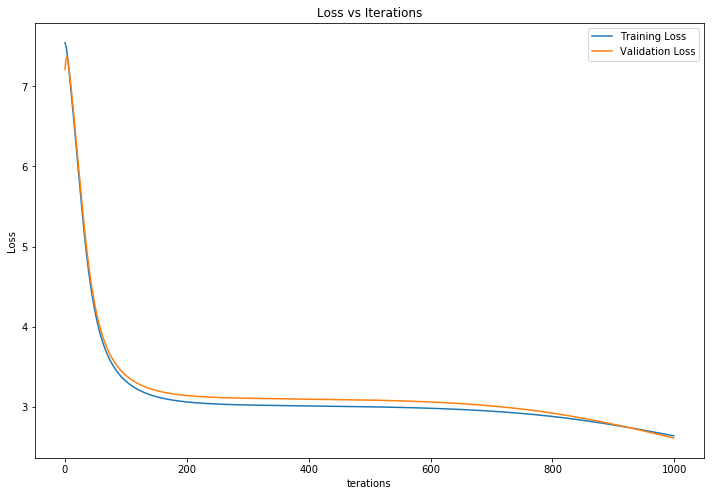

In [1161]:
def cost_plot(costs_train, costs_valid):
        plt.figure(figsize=(12,8))
        plt.title("Loss vs Iterations")
        plt.xlabel('terations')
        plt.ylabel('Loss')
        plt.plot(costs_train, label="Training Loss")
        plt.plot(costs_valid, label="Validation Loss")
        plt.legend()
        plt.show()

alpha=0.001
iterations=1000
lam=1

past_train_costs, past_valid_costs, weight_bias,train_accuracys, valid_accuracys=gradient_descent(X,y,alpha,iterations,lam)
cost_plot(past_train_costs, past_valid_costs)

## Accuracy(正解率)をｙ軸に学習曲線をプロット

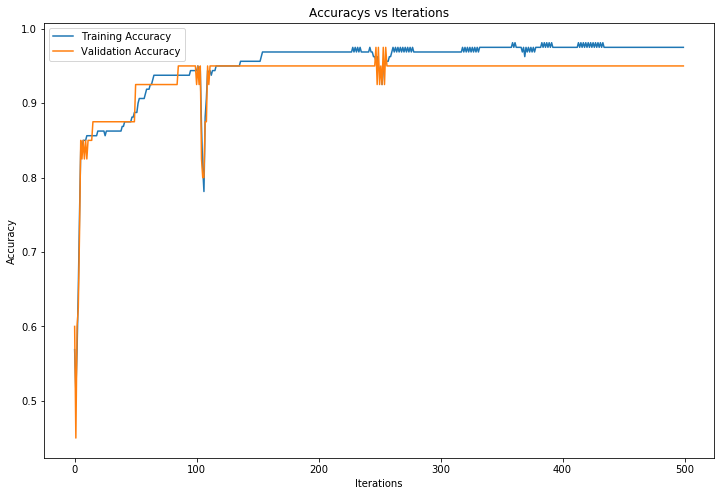

In [1162]:
def accuracy_plot(train_accuracys, valid_accuracys):
        plt.figure(figsize=(12,8))
        plt.title("Accuracys vs Iterations")
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.plot(train_accuracys, label="Training Accuracy")
        plt.plot(valid_accuracys, label="Validation Accuracy")
        plt.legend()
        plt.show()

alpha=0.01
iterations=500
lam=0.1

past_train_costs, past_valid_costs,weight_bias,train_accuracys, valid_accuracys=gradient_descent(X,y,alpha,iterations,lam)
accuracy_plot(train_accuracys, valid_accuracys)

# ハイパーパラメータ

## ハイパーパラメータの初期化

隠れ層のユニット数、学習率、正則化の初期値を適切に設定せよ。またどのようにそれぞれのハイパーパラメータを設定すべきか述べよ。

### ユニット数 30,学習率 0.005, 正則化 0.01に設定

In [1163]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

def gradient_descent(X,y,alpha,iterations,lam):   
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
    
    train_costs=[]
    valid_costs=[]
    weight_bias=[]
    train_accuracys=[]
    valid_accuracys=[]
    np.random.seed(0)
    w1=np.random.rand(2,30)
    b1=np.random.rand(1,30)
    w2=np.random.rand(30,2)        
    b2=np.random.rand(1,2)
       
    for i in range(iterations):
        a2_train=forward(X_train, w1, w2, b1, b2)
        train_pred=(a2_train>0.5).astype(np.int)
        train_accuracy=accuracy_score(y_train, train_pred)
        train_accuracys.append(train_accuracy)
        train_costs.append(cross_entropy_error(a2_train, y_train, w1, w2, lam))
        weight_bias.append([w1, w2, b1, b2])

        a2_valid=forward(X_valid, w1, w2, b1, b2)
        valid_costs.append(cross_entropy_error(a2_valid, y_valid, w1, w2, lam))
        valid_pred=(a2_valid>0.5).astype(np.int)
        valid_accuracy=accuracy_score(y_valid, valid_pred)
        valid_accuracys.append(valid_accuracy)

        a1, delta2, delta3=backprob(X_train, y_train, w1, w2, b1, b2, a2_train)

        w1= w1 - alpha*(np.dot(X_train.T, delta2)+lam*w1)
        w2= w2 - alpha*(np.dot(a1.T, delta3)+lam*w2)
        b1 = b1 - alpha*delta2.sum(axis=0)
        b2 = b2 - alpha*delta3.sum(axis=0)

        
    return train_costs, valid_costs, weight_bias,train_accuracys,valid_accuracys

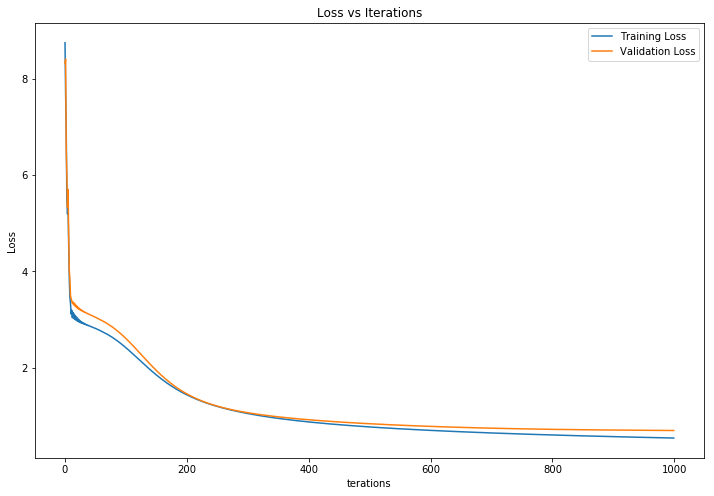

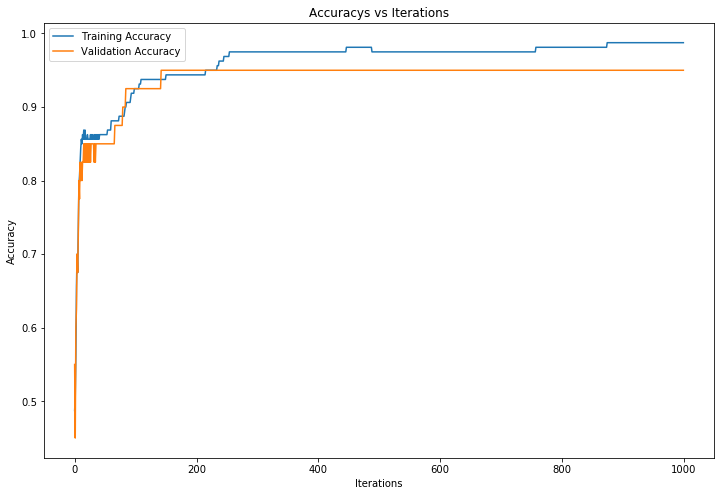

In [1164]:
def cost_plot(costs_train, costs_valid):
        plt.figure(figsize=(12,8))
        plt.title("Loss vs Iterations")
        plt.xlabel('terations')
        plt.ylabel('Loss')
        plt.plot(costs_train, label="Training Loss")
        plt.plot(costs_valid, label="Validation Loss")
        plt.legend()
        plt.show()
        
def accuracy_plot(train_accuracys, valid_accuracys):
        plt.figure(figsize=(12,8))
        plt.title("Accuracys vs Iterations")
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.plot(train_accuracys, label="Training Accuracy")
        plt.plot(valid_accuracys, label="Validation Accuracy")
        plt.legend()
        plt.show()


alpha=0.005
iterations=1000
lam=0.01

past_train_costs, past_valid_costs, weight_bias,train_accuracys, valid_accuracys=gradient_descent(X,y,alpha,iterations,lam)
cost_plot(past_train_costs, past_valid_costs)
accuracy_plot(train_accuracys, valid_accuracys)

## ハイパーパラメータチューニング

隠れ層のユニット数、学習率、正則化におけるパラメータを変更し、どのように学習結果が変わるか、調査せよ。その調査結果を記述すること。

### ユニット数 1000,学習率 0.005, 正則化 0.01に設定

In [1165]:

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

def gradient_descent(X,y,alpha,iterations,lam):   
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
    
    train_costs=[]
    valid_costs=[]
    weight_bias=[]
    train_accuracys=[]
    valid_accuracys=[]
    np.random.seed(0)
    w1=np.random.rand(2,1000)
    b1=np.random.rand(1,1000)
    w2=np.random.rand(1000,2)        
    b2=np.random.rand(1,2)
       
    for i in range(iterations):
        a2_train=forward(X_train, w1, w2, b1, b2)
        train_pred=(a2_train>0.5).astype(np.int)
        train_accuracy=accuracy_score(y_train, train_pred)
        train_accuracys.append(train_accuracy)
        train_costs.append(cross_entropy_error(a2_train, y_train, w1, w2, lam))
        weight_bias.append([w1, w2, b1, b2])

        a2_valid=forward(X_valid, w1, w2, b1, b2)
        valid_costs.append(cross_entropy_error(a2_valid, y_valid, w1, w2, lam))
        valid_pred=(a2_valid>0.5).astype(np.int)
        valid_accuracy=accuracy_score(y_valid, valid_pred)
        valid_accuracys.append(valid_accuracy)

        a1, delta2, delta3=backprob(X_train, y_train, w1, w2, b1, b2, a2_train)

        w1= w1 - alpha*(np.dot(X_train.T, delta2)+lam*w1)
        w2= w2 - alpha*(np.dot(a1.T, delta3)+lam*w2)
        b1 = b1 - alpha*delta2.sum(axis=0)
        b2 = b2 - alpha*delta3.sum(axis=0)

        
    return train_costs, valid_costs, weight_bias,train_accuracys,valid_accuracys

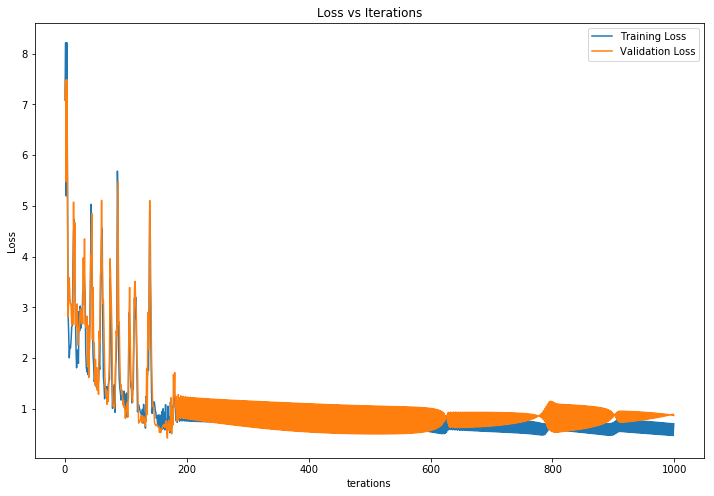

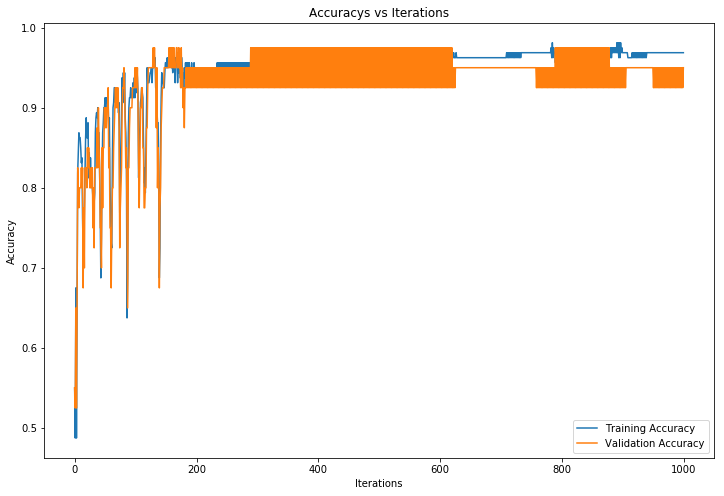

In [1166]:
def cost_plot(costs_train, costs_valid):
        plt.figure(figsize=(12,8))
        plt.title("Loss vs Iterations")
        plt.xlabel('terations')
        plt.ylabel('Loss')
        plt.plot(costs_train, label="Training Loss")
        plt.plot(costs_valid, label="Validation Loss")
        plt.legend()
        plt.show()
        
def accuracy_plot(train_accuracys, valid_accuracys):
        plt.figure(figsize=(12,8))
        plt.title("Accuracys vs Iterations")
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.plot(train_accuracys, label="Training Accuracy")
        plt.plot(valid_accuracys, label="Validation Accuracy")
        plt.legend()
        plt.show()


alpha=0.005
iterations=1000
lam=0.01

past_train_costs, past_valid_costs, weight_bias,train_accuracys, valid_accuracys=gradient_descent(X,y,alpha,iterations,lam)
cost_plot(past_train_costs, past_valid_costs)
accuracy_plot(train_accuracys, valid_accuracys)

### ユニット数100,学習率0.001,正則化0.1

In [1167]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

def gradient_descent(X,y,alpha,iterations,lam):   
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
    
    train_costs=[]
    valid_costs=[]
    weight_bias=[]
    train_accuracys=[]
    valid_accuracys=[]
    np.random.seed(0)
    w1=np.random.rand(2,100)
    b1=np.random.rand(1,100)
    w2=np.random.rand(100,2)        
    b2=np.random.rand(1,2)
       
    for i in range(iterations):
        a2_train=forward(X_train, w1, w2, b1, b2)
        train_pred=(a2_train>0.5).astype(np.int)
        train_accuracy=accuracy_score(y_train, train_pred)
        train_accuracys.append(train_accuracy)
        train_costs.append(cross_entropy_error(a2_train, y_train, w1, w2, lam))
        weight_bias.append([w1, w2, b1, b2])

        a2_valid=forward(X_valid, w1, w2, b1, b2)
        valid_costs.append(cross_entropy_error(a2_valid, y_valid, w1, w2, lam))
        valid_pred=(a2_valid>0.5).astype(np.int)
        valid_accuracy=accuracy_score(y_valid, valid_pred)
        valid_accuracys.append(valid_accuracy)

        a1, delta2, delta3=backprob(X_train, y_train, w1, w2, b1, b2, a2_train)

        w1= w1 - alpha*(np.dot(X_train.T, delta2)+lam*w1)
        w2= w2 - alpha*(np.dot(a1.T, delta3)+lam*w2)
        b1 = b1 - alpha*delta2.sum(axis=0)
        b2 = b2 - alpha*delta3.sum(axis=0)

        
    return train_costs, valid_costs, weight_bias,train_accuracys,valid_accuracys

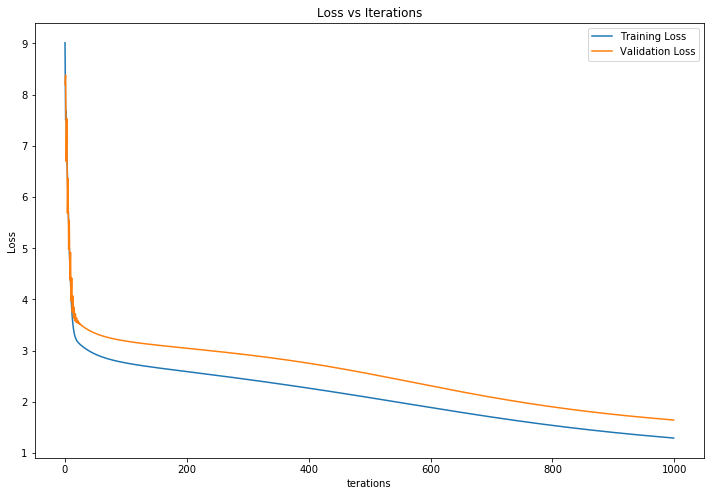

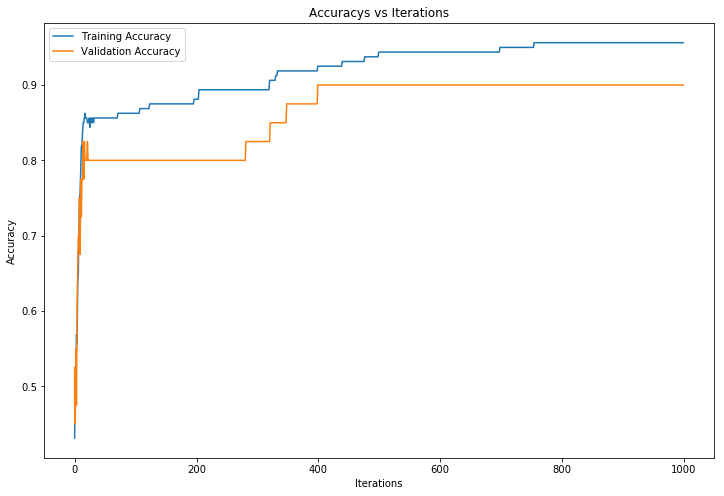

In [1168]:
def cost_plot(costs_train, costs_valid):
        plt.figure(figsize=(12,8))
        plt.title("Loss vs Iterations")
        plt.xlabel('terations')
        plt.ylabel('Loss')
        plt.plot(costs_train, label="Training Loss")
        plt.plot(costs_valid, label="Validation Loss")
        plt.legend()
        plt.show()
        
def accuracy_plot(train_accuracys, valid_accuracys):
        plt.figure(figsize=(12,8))
        plt.title("Accuracys vs Iterations")
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.plot(train_accuracys, label="Training Accuracy")
        plt.plot(valid_accuracys, label="Validation Accuracy")
        plt.legend()
        plt.show()


alpha=0.001
iterations=1000
lam=0.1

past_train_costs, past_valid_costs, weight_bias,train_accuracys, valid_accuracys=gradient_descent(X,y,alpha,iterations,lam)
cost_plot(past_train_costs, past_valid_costs)
accuracy_plot(train_accuracys, valid_accuracys)

### ユニット数100,学習率0.1,正則化0.1

In [1169]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

def gradient_descent(X,y,alpha,iterations,lam):   
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
    
    train_costs=[]
    valid_costs=[]
    weight_bias=[]
    train_accuracys=[]
    valid_accuracys=[]
    np.random.seed(0)
    w1=np.random.rand(2,100)
    b1=np.random.rand(1,100)
    w2=np.random.rand(100,2)        
    b2=np.random.rand(1,2)
       
    for i in range(iterations):
        a2_train=forward(X_train, w1, w2, b1, b2)
        train_pred=(a2_train>0.5).astype(np.int)
        train_accuracy=accuracy_score(y_train, train_pred)
        train_accuracys.append(train_accuracy)
        train_costs.append(cross_entropy_error(a2_train, y_train, w1, w2, lam))
        weight_bias.append([w1, w2, b1, b2])

        a2_valid=forward(X_valid, w1, w2, b1, b2)
        valid_costs.append(cross_entropy_error(a2_valid, y_valid, w1, w2, lam))
        valid_pred=(a2_valid>0.5).astype(np.int)
        valid_accuracy=accuracy_score(y_valid, valid_pred)
        valid_accuracys.append(valid_accuracy)

        a1, delta2, delta3=backprob(X_train, y_train, w1, w2, b1, b2, a2_train)

        w1= w1 - alpha*(np.dot(X_train.T, delta2)+lam*w1)
        w2= w2 - alpha*(np.dot(a1.T, delta3)+lam*w2)
        b1 = b1 - alpha*delta2.sum(axis=0)
        b2 = b2 - alpha*delta3.sum(axis=0)

        
    return train_costs, valid_costs, weight_bias,train_accuracys,valid_accuracys

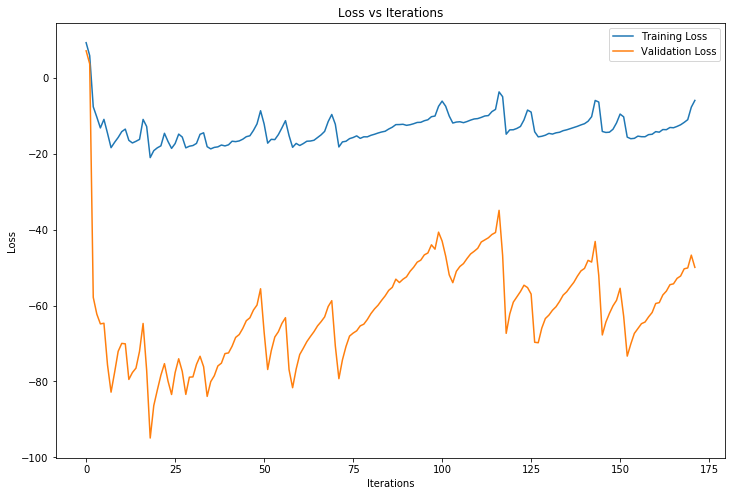

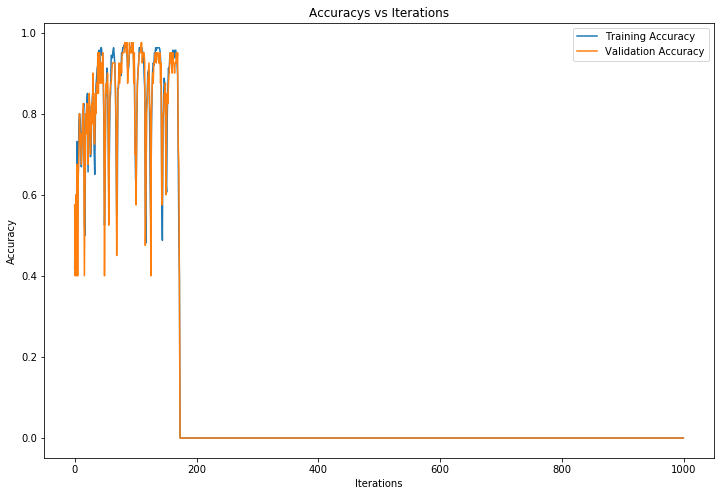

In [1170]:
def cost_plot(costs_train, costs_valid):
        plt.figure(figsize=(12,8))
        plt.title("Loss vs Iterations")
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.plot(costs_train, label="Training Loss")
        plt.plot(costs_valid, label="Validation Loss")
        plt.legend()
        plt.show()
        
def accuracy_plot(train_accuracys, valid_accuracys):
        plt.figure(figsize=(12,8))
        plt.title("Accuracys vs Iterations")
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.plot(train_accuracys, label="Training Accuracy")
        plt.plot(valid_accuracys, label="Validation Accuracy")
        plt.legend()
        plt.show()


alpha=0.1
iterations=1000
lam=0.1

past_train_costs, past_valid_costs, weight_bias,train_accuracys, valid_accuracys=gradient_descent(X,y,alpha,iterations,lam)
cost_plot(past_train_costs, past_valid_costs)
accuracy_plot(train_accuracys, valid_accuracys)

今度は学習率のみを0.1に変更しました。値が発散していることがわかりました。学習率は微笑値が妥当だということができます。

# 決定境界の実装

## plot_decision_boundary関数を用いて、決定境界をプロットせよ。

In [1194]:
def pred_func(X,weight_bias):
    w1=weight_bias[-1][0]
    w2=weight_bias[-1][1]
    b1=weight_bias[-1][2]
    b2=weight_bias[-1][3]
    a2=forward(X, w1, w2, b1, b2)
    return np.argmax(a2, axis=1)

In [1173]:
argma

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [1174]:
X.shape

(200, 2)

In [1202]:
pred_func(X, weight_bias)

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [1197]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()],weight_bias) #配列を一次元化する
    Z = Z.reshape(xx.shape)
    #2次元プロット上に曲面の塗りつぶした等高線を描画
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap=plt.cm.Spectral)

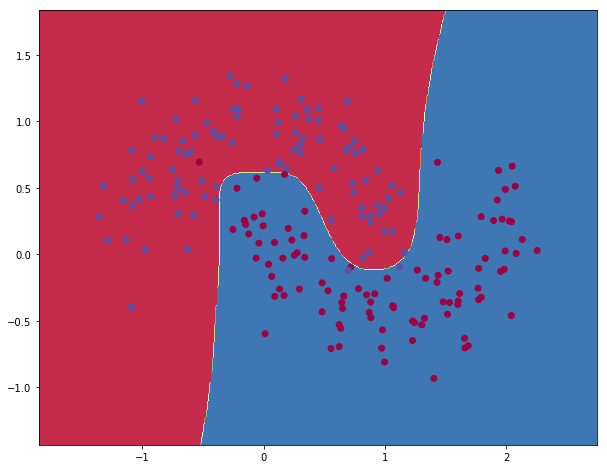

In [1203]:
plot_decision_boundary(pred_func)

In [1181]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = svm.predict(X1)
accuracy_train = accuracy_score(y1, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 0.94


# 自習用

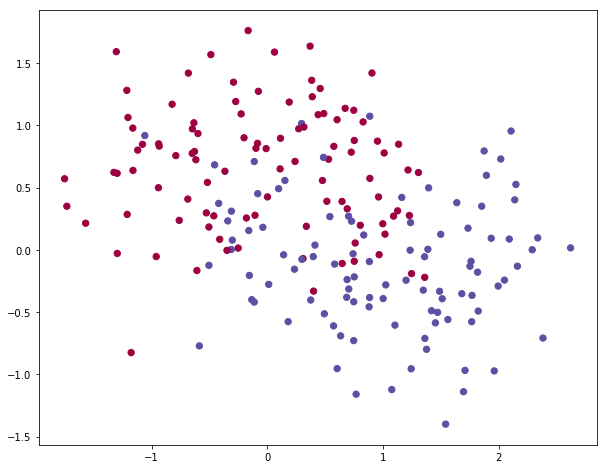

In [1204]:
# Generate a dataset and plot it
np.random.seed(0)
X1, y1 = sklearn.datasets.make_moons(200, noise=0.40)
plt.scatter(X1[:,0], X1[:,1], s=40, c=y1, cmap=plt.cm.Spectral)

In [1106]:
#自習用の予測
def plot_decision_boundary_study(pred_func):
    # Set min and max values and give it some padding
    x1_min, x1_max = X1[:, 0].min() - .5, X1[:, 0].max() + .5
    y1_min, y1_max = X1[:, 1].min() - .5, X1[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(y1_min, y1_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X1[:, 1], c=y1, cmap=plt.cm.Spectral)

## Logistic Regression

In [1205]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X1, y1)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

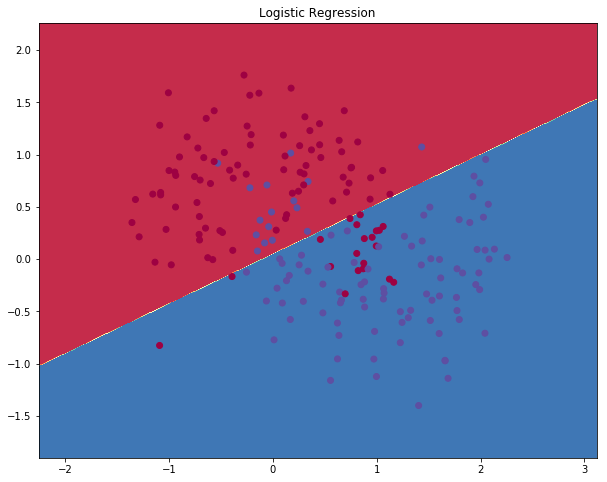

In [1206]:
# Plot the decision boundary (the method is in the main code link provided in the end)
plot_decision_boundary_study(lambda X1: clf.predict(X1))
plt.title("Logistic Regression")

In [1207]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = clf.predict(X1)
accuracy_train = accuracy_score(y1, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 0.82


グラフは、ロジスティック回帰で学習した結果を表示しています。
できるだけ一直線でできるだけいい感じで分けていますが、今回のMoon Shapeをうまく捉えていないと言えます。

## Random Forest Classifier

In [1208]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth= 3, random_state=1)
rfc.fit(X1, y1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

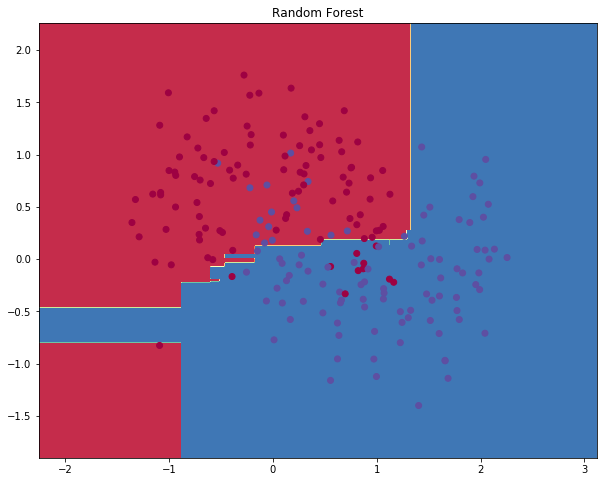

In [1209]:
# Plot the decision boundary (the method is in the main code link provided in the end)
plot_decision_boundary_study(lambda x1: rfc.predict(x1))
plt.title("Random Forest")

In [1210]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = rfc.predict(X1)
accuracy_train = accuracy_score(y1, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 0.85


## Support Vector Machine Classifier

In [1211]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X1, y1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

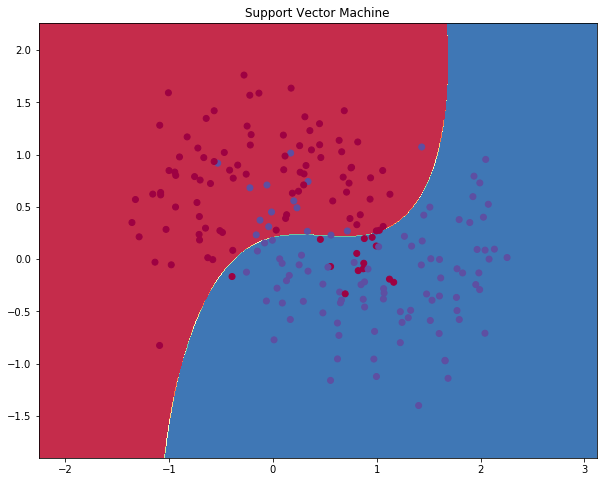

In [1212]:
# Plot the decision boundary (the method is in the main code link provided in the end)
plot_decision_boundary_study(lambda x1: svm.predict(x1))
plt.title("Support Vector Machine")

In [1213]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = svm.predict(X1)
accuracy_train = accuracy_score(y1, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 0.82


## Light GBM Classifier

In [1214]:
import lightgbm as lgb
gbm = lgb.LGBMClassifier()
gbm.fit(X1, y1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

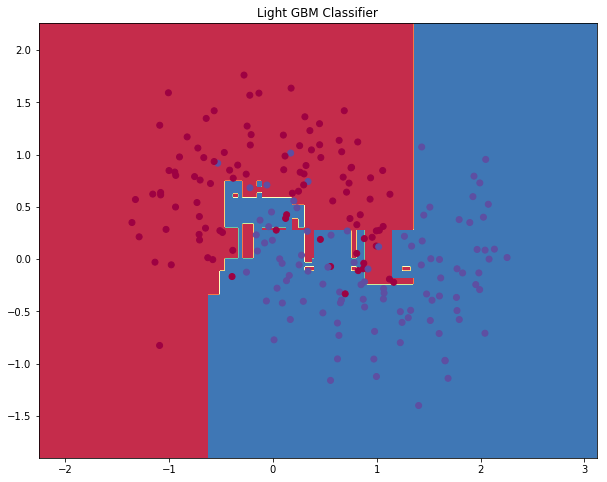

In [1215]:
# Plot the decision boundary (the method is in the main code link provided in the end)
plot_decision_boundary_study(lambda x1: gbm.predict(x1))
plt.title("Light GBM Classifier")

In [1216]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = gbm.predict(X1)
accuracy_train = accuracy_score(y1, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 0.95
